In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3713 total reviews
Scraping page 5
   ---> 3713 total reviews
Scraping page 6
   ---> 3713 total reviews
Scraping page 7
   ---> 3713 total reviews
Scraping page 8
   ---> 3713 total reviews
Scraping page 9
   ---> 3713 total reviews
Scraping page 10
   ---> 3713 total reviews
Scraping page 11
   ---> 3713 total reviews
Scraping page 12
   ---> 3713 total reviews
Scraping page 13
   ---> 3713 total reviews
Scraping page 14
   ---> 3713 total reviews
Scraping page 15
   ---> 3713 total reviews
Scraping page 16
   ---> 3713 total reviews
Scraping page 17
   ---> 3713 total reviews
Scraping page 18
   ---> 3713 total reviews
Scraping page 19
   ---> 3713 total reviews
Scraping page 20
   ---> 3713 total reviews


In [387]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Once again a terrible busine...
1,✅ Trip Verified | BA A380's are showing their...
2,✅ Trip Verified | Credit to BA - Flew to Sin...
3,✅ Trip Verified | The check in area for prem...
4,✅ Trip Verified | The flight took off a littl...


In [388]:
df.to_csv("data/BA_reviews.csv")

In [389]:
df.shape

(3713, 1)

In [390]:
df.isnull().sum()

reviews    0
dtype: int64

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3713 non-null   object
dtypes: object(1)
memory usage: 29.1+ KB


In [392]:
import re
from bs4 import BeautifulSoup

def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    q = q.replace(' ba |ba|b a|british airways|british airlines|british airline', ' british airway ')
    q = q.replace(',000 ', 'k ')


    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q, 'html.parser').get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q


In [393]:
df['reviews']=df['reviews'].apply(preprocess)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [394]:
df['reviews'][1]

'trip verified   ba a380 s are showing their age  hopefully they will update the interiors soon because it was a let down especially when the flight lasts 11 hours  cabin crew were good and helpful  dinner was ok but the breakfast was grim  on board entertainment was not the latest and seat back usb points did not work  the only upside of ba is that it is only 1 of 2 airlines who fly this route directly and their pricing reflects this  if you are prepared to lay over then there are better airlines out there'

In [395]:
import numpy as np
df['verified'] = np.where(
    df['reviews'].str.contains('trip verified|review verified|verified trip|verified review', case=True, regex=True),
    'verified',
    np.where(df['reviews'].str.contains('unverified|not verified', case=True, regex=True), 'not verified', 'unmarked')
)

In [396]:
df['verified'].unique()

array(['verified', 'not verified', 'unmarked'], dtype=object)

In [397]:
df['verified'].value_counts()  #here, we can get to know that only 1165/3713 trips are verified

verified        1935
unmarked        1524
not verified     254
Name: verified, dtype: int64

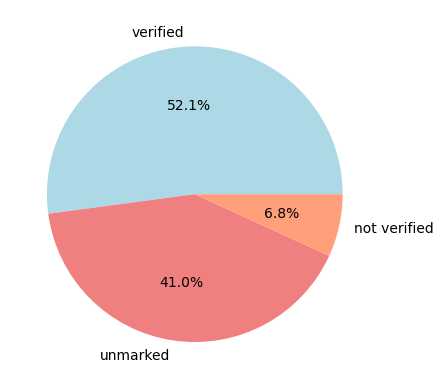

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['verified'].value_counts(),labels=df['verified'].value_counts().index,autopct='%1.1f%%', colors=['lightblue', 'lightcoral','lightsalmon'])
plt.show()

In [399]:
df.head()

,reviews,verified
0,trip verified once again a terrible business...,verified
1,trip verified ba a380 s are showing their ag...,verified
2,trip verified credit to ba flew to singapo...,verified
3,trip verified the check in area for premium ...,verified
4,trip verified the flight took off a little l...,verified


In [400]:
df[df['verified']=='unmarked']

,reviews,verified
1284,two regular an uneventful flights curiously e...,unmarked
1925,flew london gatwick to tampa with british airw...,unmarked
1929,frankfurt to cape town via london heathrow th...,unmarked
1938,bangkok to manchester via london i used to fl...,unmarked
1939,the return flight from st lucia started well ...,unmarked
...,...,...
3708,lhr jfk lax lhr check in was ok apart from be...,unmarked
3709,lhr to ham purser addresses all club passenge...,unmarked
3710,my son who had worked for british airways urge...,unmarked
3711,london city new york jfk via shannon on a318 b...,unmarked


In [401]:
df['reviews'][1284]

'two regular an uneventful flights  curiously enough  though  with the exact same crew  the crew were very nice and the service is very attentive and polite  but i just cannot take it that british airways has chosen to provide a service just like low cost carriers  where everything is charged for  apart from luggage  on the second leg of the trip  the aircraft felt extremely warm and for some odd reason  row 6 where i was sitting did not have ac'

In [402]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['lemmatized_reviews'] = df['reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [403]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [404]:
df['lemmatized_reviews'] = df['lemmatized_reviews'].apply(remove_stopwords)

In [405]:
df.lemmatized_reviews[1]

'trip verified ba a380 showing age hopefully update interior soon wa let especially flight last 11 hour cabin crew good helpful dinner wa ok breakfast wa grim board entertainment wa latest seat back usb point work upside ba 1 2 airline fly route directly pricing reflects prepared lay better airline'

In [406]:
def sent_length(text):   #sentence length
    return len(text)
df['length'] = df['lemmatized_reviews'].apply(sent_length)

In [407]:
def word_count(text):   #word count
    words = nltk.word_tokenize(text)
    return len(words)
df['word_count']=df['lemmatized_reviews'].apply(word_count)

In [408]:
df.head()

,reviews,verified,lemmatized_reviews,length,word_count
0,trip verified once again a terrible business...,verified,trip verified terrible business class experien...,581,89
1,trip verified ba a380 s are showing their ag...,verified,trip verified ba a380 showing age hopefully up...,298,50
2,trip verified credit to ba flew to singapo...,verified,trip verified credit ba flew singapore recentl...,340,50
3,trip verified the check in area for premium ...,verified,trip verified check area premium class gatwick...,1638,247
4,trip verified the flight took off a little l...,verified,trip verified flight took little late due heat...,262,38


In [409]:
df.describe()   #descriptive measures on numerical columns

,length,word_count
count,3713.000000,3713.000000
mean,585.569890,90.299488
std,364.143792,56.212269
min,57.000000,9.000000
25%,326.000000,50.000000
50%,495.000000,76.000000
75%,734.000000,113.000000
max,2467.000000,386.000000


In [410]:
df.head()

,reviews,verified,lemmatized_reviews,length,word_count
0,trip verified once again a terrible business...,verified,trip verified terrible business class experien...,581,89
1,trip verified ba a380 s are showing their ag...,verified,trip verified ba a380 showing age hopefully up...,298,50
2,trip verified credit to ba flew to singapo...,verified,trip verified credit ba flew singapore recentl...,340,50
3,trip verified the check in area for premium ...,verified,trip verified check area premium class gatwick...,1638,247
4,trip verified the flight took off a little l...,verified,trip verified flight took little late due heat...,262,38


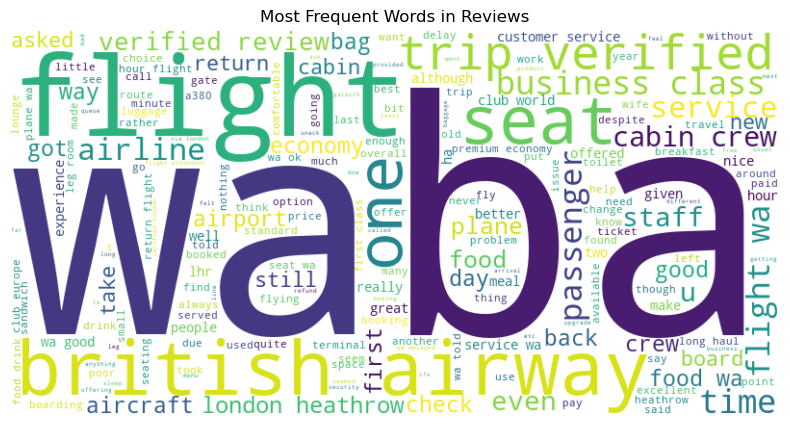

In [411]:
#creating wordcloud for visualization
from wordcloud import WordCloud

all_reviews = ' '.join(df['lemmatized_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

In [412]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'
df['sentiment'] = df['lemmatized_reviews'].apply(get_sentiment)

In [413]:
df.head()

,reviews,verified,lemmatized_reviews,length,word_count,sentiment
0,trip verified once again a terrible business...,verified,trip verified terrible business class experien...,581,89,negative
1,trip verified ba a380 s are showing their ag...,verified,trip verified ba a380 showing age hopefully up...,298,50,positive
2,trip verified credit to ba flew to singapo...,verified,trip verified credit ba flew singapore recentl...,340,50,positive
3,trip verified the check in area for premium ...,verified,trip verified check area premium class gatwick...,1638,247,positive
4,trip verified the flight took off a little l...,verified,trip verified flight took little late due heat...,262,38,positive


In [414]:
df['sentiment'].value_counts()  #positive/negative/neutral experience (70%,28%,2%)

positive    2615
negative    1072
neutral       26
Name: sentiment, dtype: int64

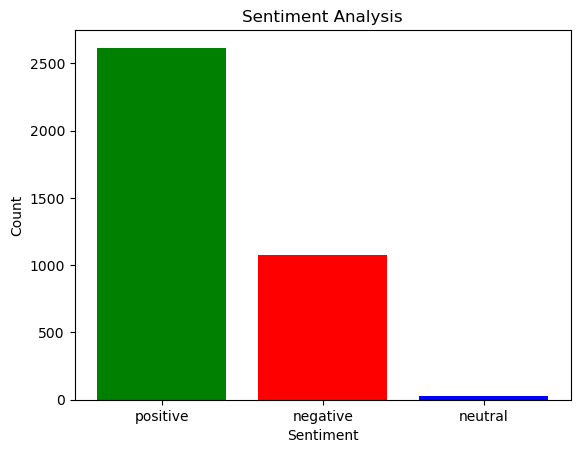

In [415]:
plt.bar(df['sentiment'].value_counts().index, df['sentiment'].value_counts().values, color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [416]:
from sklearn.feature_extraction.text import CountVectorizer


# Create a CountVectorizer to identify the most frequent words or n-grams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(df['lemmatized_reviews'])

feature_names = vectorizer.get_feature_names_out() #feature names

word_counts = X.sum(axis=0) # Sum the counts of each feature
df_word_counts = pd.DataFrame({'word': feature_names, 'count': word_counts.A1})    #store the word counts
df_word_counts = df_word_counts.sort_values(by='count', ascending=False) #count in descending order

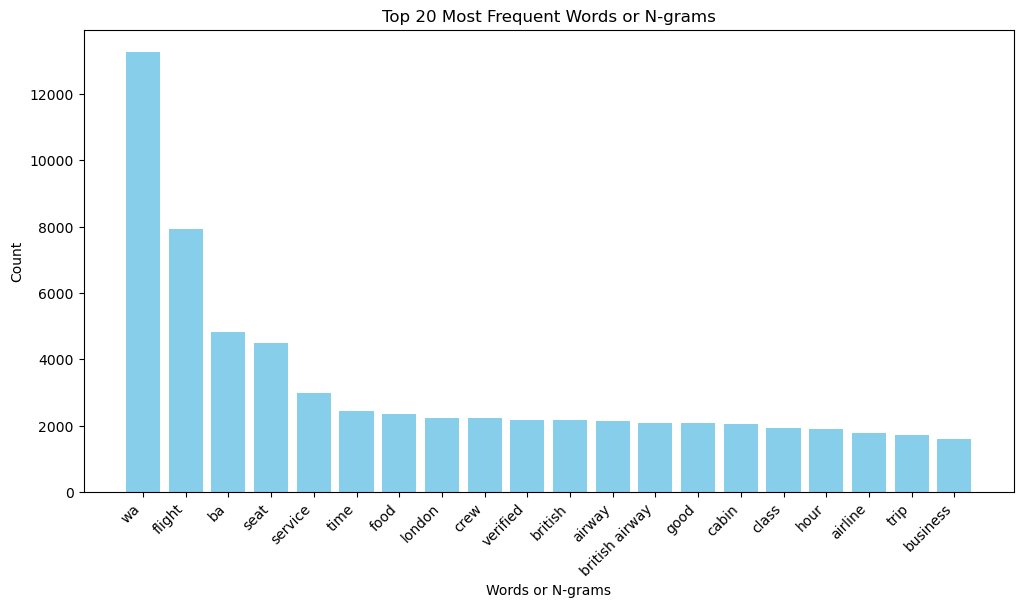

In [417]:
plt.figure(figsize=(12, 6))
plt.bar(df_word_counts['word'][:20], df_word_counts['count'][:20], color='skyblue')
plt.title('Top 20 Most Frequent Words or N-grams')
plt.xlabel('Words or N-grams')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [418]:
# flight, ba, british airway, london, time, food, service, verified, good etc are some words which are most frequent

In [420]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_reviews'])

In [422]:
# K means clustering for advance analytics
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [423]:
df.head()

,reviews,verified,lemmatized_reviews,length,word_count,sentiment,cluster
0,trip verified once again a terrible business...,verified,trip verified terrible business class experien...,581,89,negative,2
1,trip verified ba a380 s are showing their ag...,verified,trip verified ba a380 showing age hopefully up...,298,50,positive,1
2,trip verified credit to ba flew to singapo...,verified,trip verified credit ba flew singapore recentl...,340,50,positive,4
3,trip verified the check in area for premium ...,verified,trip verified check area premium class gatwick...,1638,247,positive,0
4,trip verified the flight took off a little l...,verified,trip verified flight took little late due heat...,262,38,positive,0


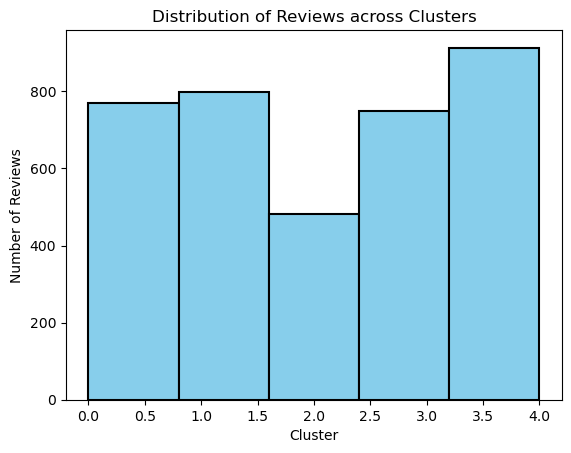

In [424]:
plt.hist(df['cluster'], bins=num_clusters, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Reviews across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.show()

In [425]:
df.cluster.unique() #creating total 5 clusters having same reviews

array([2, 1, 4, 0, 3])

In [426]:
df.cluster.value_counts()

4    913
1    798
0    769
3    750
2    483
Name: cluster, dtype: int64

In [432]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
tokenized_reviews = [review.split() for review in df['lemmatized_reviews']]
te = TransactionEncoder()
te_ary = te.fit(tokenized_reviews).transform(tokenized_reviews)
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_apriori, min_support=0.4, use_colnames=True)
frequent_itemsets

#using apriori algo, we could see that airway, flight, ba(british airway), london, service, verified etc are frequent
#we can set min_support values accordingly, to find variations

,support,itemsets
0,0.402909,(airway)
1,0.594129,(ba)
2,0.405602,(british)
3,0.812281,(flight)
4,0.455158,(food)
5,0.489362,(london)
6,0.547536,(seat)
7,0.494210,(service)
8,0.440075,(time)
9,0.584164,(verified)


In [434]:
df.columns

Index(['reviews', 'verified', 'lemmatized_reviews', 'length', 'word_count',
       'sentiment', 'cluster'],
      dtype='object')

# Task 2

In [1007]:
df=pd.read_csv(r"C:\Users\KIIT\Data_Science\Forage Data Science Projects\data\customer_booking.csv",encoding="ISO-8859-1")

In [1008]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [1009]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [1010]:
df['route_length'] = df['route'].str.len()

In [1011]:
df['route'] = df['route'].apply(lambda x: '-'.join([x[i:i+3] for i in range(0, len(x), 3)]))

In [1012]:
df[['start', 'end']] = df['route'].str.split('-', 1, expand=True)

In [1013]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end
0,2,Internet,RoundTrip,262,19,7,Sat,AKL-DEL,New Zealand,1,0,0,5.52,0,6,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKL-DEL,New Zealand,0,0,0,5.52,0,6,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKL-DEL,India,1,1,0,5.52,0,6,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKL-DEL,New Zealand,0,0,1,5.52,0,6,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKL-DEL,India,1,0,1,5.52,0,6,AKL,DEL


In [1014]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  route_length           50000 non-null  int64  
 15  st

In [1015]:
df.shape

(50000, 17)

In [1016]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
route_length             0
start                    0
end                      0
dtype: int64

In [1017]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

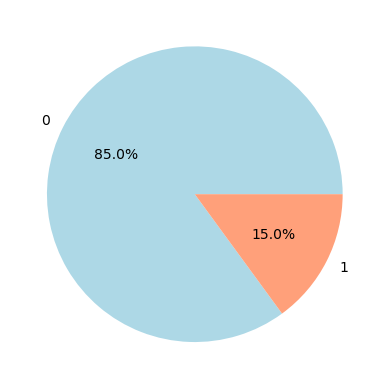

In [1018]:
plt.pie(df.booking_complete.value_counts(),labels=df.booking_complete.value_counts().index,autopct='%1.1f%%', colors=['lightblue','lightsalmon'])
plt.show()

#imbalanced dataset

In [1019]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,6.0
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,0.0
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,6.0
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,6.0
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,6.0
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,6.0
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,6.0


C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='num_passengers'>

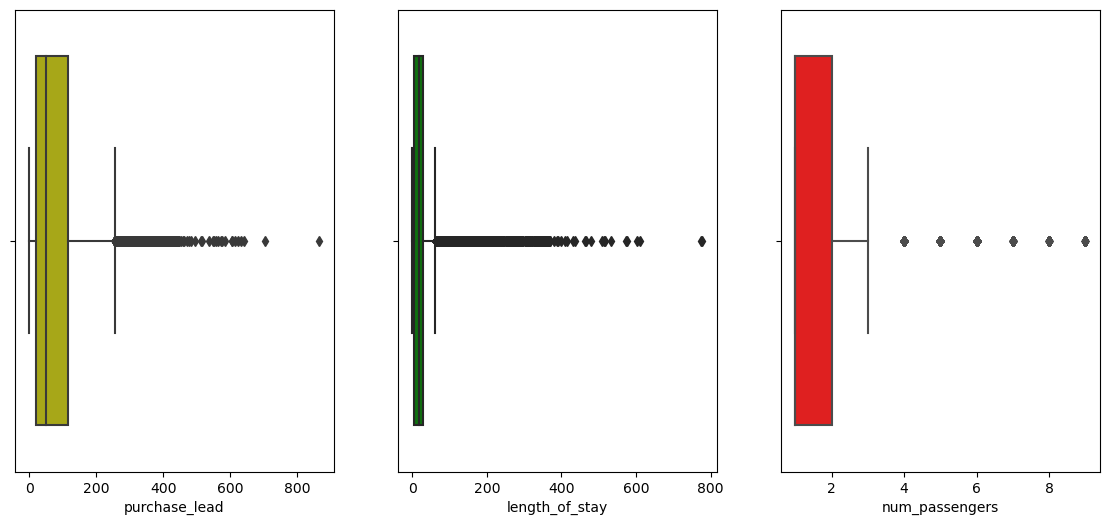

In [1020]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.boxplot(df['purchase_lead'], color='y')
plt.subplot(132)
sns.boxplot(df['length_of_stay'], color='g')
plt.subplot(133)
sns.boxplot(df['num_passengers'], color='r')

#checking for outliers in purchase_lead and length_of_stay

In [1021]:
Q1 = np.percentile(df['purchase_lead'], 25)
Q3 = np.percentile(df['purchase_lead'], 75)
IQR = Q3 - Q1
print(IQR)

94.0


In [1022]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower bound:',lower_bound)
print('Upper bound:',upper_bound)

Lower bound: -120.0
Upper bound: 256.0


In [1023]:
total_outliers = df[(df['purchase_lead'] < lower_bound) | (df['purchase_lead'] > upper_bound)].shape[0]
print("Total outliers:", total_outliers)

Total outliers: 3456


In [1024]:
df['purchase_lead']=[upper_bound if x>upper_bound else x for x in df['purchase_lead']]

Fixing outliers for length_of_stay

In [1025]:
Q1 = np.percentile(df['length_of_stay'], 25)
Q3 = np.percentile(df['length_of_stay'], 75)
IQR = Q3 - Q1
print(IQR)

23.0


In [1026]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower bound:',lower_bound)
print('Upper bound:',upper_bound)

Lower bound: -29.5
Upper bound: 62.5


In [1027]:
total_outliers = df[(df['length_of_stay'] < lower_bound) | (df['length_of_stay'] > upper_bound)].shape[0]
print("Total outliers:", total_outliers)

Total outliers: 3807


In [1028]:
df['length_of_stay']=[upper_bound if x>upper_bound else x for x in df['length_of_stay']]

Fixing outliers for Number of passenger

In [1029]:
Q1 = np.percentile(df['num_passengers'], 25)
Q3 = np.percentile(df['num_passengers'], 75)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower bound:',lower_bound)
print('Upper bound:',upper_bound)

total_outliers = df[(df['num_passengers'] < lower_bound) | (df['num_passengers'] > upper_bound)].shape[0]
print("Total outliers:", total_outliers)

1.0
Lower bound: -0.5
Upper bound: 3.5
Total outliers: 2903


In [1030]:
df['num_passengers']=[np.round(upper_bound) if x>upper_bound else x for x in df['length_of_stay']]
df['num_passengers']=[1 if x<lower_bound else x for x in df['length_of_stay']]

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='num_passengers'>

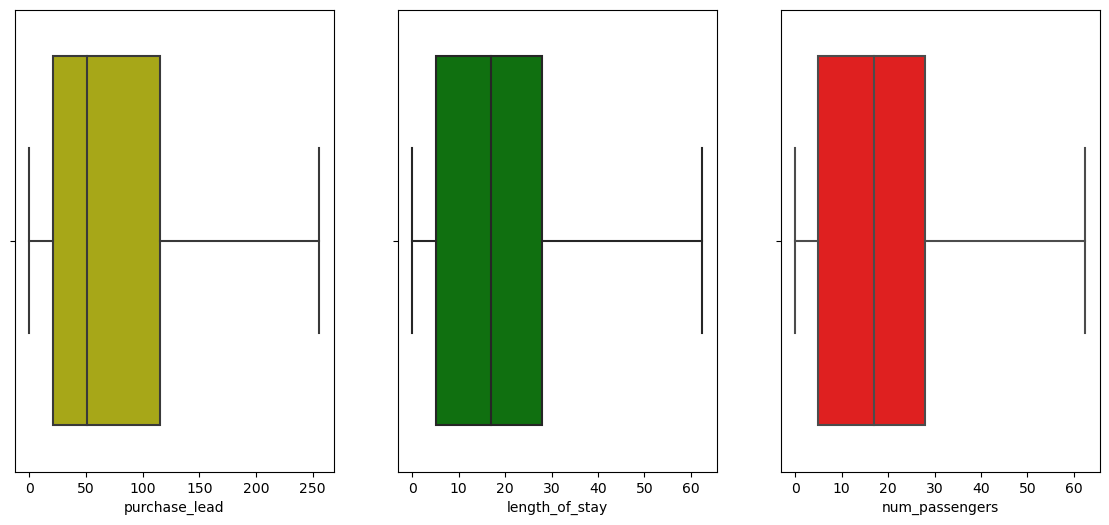

In [1031]:
plt.figure(figsize=(14,6))
plt.subplot(131)
sns.boxplot(df['purchase_lead'], color='y')
plt.subplot(132)
sns.boxplot(df['length_of_stay'], color='g')
plt.subplot(133)
sns.boxplot(df['num_passengers'], color='r')

In [1032]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end
0,19.0,Internet,RoundTrip,256.0,19.0,7,Sat,AKL-DEL,New Zealand,1,0,0,5.52,0,6,AKL,DEL
1,20.0,Internet,RoundTrip,112.0,20.0,3,Sat,AKL-DEL,New Zealand,0,0,0,5.52,0,6,AKL,DEL
2,22.0,Internet,RoundTrip,243.0,22.0,17,Wed,AKL-DEL,India,1,1,0,5.52,0,6,AKL,DEL
3,31.0,Internet,RoundTrip,96.0,31.0,4,Sat,AKL-DEL,New Zealand,0,0,1,5.52,0,6,AKL,DEL
4,22.0,Internet,RoundTrip,68.0,22.0,15,Wed,AKL-DEL,India,1,0,1,5.52,0,6,AKL,DEL


In [1033]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,19.343330,79.978080,19.343330,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,6.0
std,18.321769,76.829501,18.321769,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,0.0
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,6.0
25%,5.000000,21.000000,5.000000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,6.0
50%,17.000000,51.000000,17.000000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,6.0
75%,28.000000,115.000000,28.000000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,6.0
max,62.500000,256.000000,62.500000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,6.0


In [1034]:
bins = [0, 10, 30, float('inf')]
labels = ['short_stay', 'medium_stay', 'long_stay']
df['length_of_stay_category'] = pd.cut(df['length_of_stay'], bins=bins, labels=labels)

In [1035]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end,length_of_stay_category
0,19.0,Internet,RoundTrip,256.0,19.0,7,Sat,AKL-DEL,New Zealand,1,0,0,5.52,0,6,AKL,DEL,medium_stay
1,20.0,Internet,RoundTrip,112.0,20.0,3,Sat,AKL-DEL,New Zealand,0,0,0,5.52,0,6,AKL,DEL,medium_stay
2,22.0,Internet,RoundTrip,243.0,22.0,17,Wed,AKL-DEL,India,1,1,0,5.52,0,6,AKL,DEL,medium_stay
3,31.0,Internet,RoundTrip,96.0,31.0,4,Sat,AKL-DEL,New Zealand,0,0,1,5.52,0,6,AKL,DEL,long_stay
4,22.0,Internet,RoundTrip,68.0,22.0,15,Wed,AKL-DEL,India,1,0,1,5.52,0,6,AKL,DEL,medium_stay


In [1036]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sales_channel']=le.fit_transform(df['sales_channel'])
df['trip_type']=le.fit_transform(df['trip_type'])
df['route']=le.fit_transform(df['route'])
df['booking_origin']=le.fit_transform(df['booking_origin'])
df['start']=le.fit_transform(df['start'])
df['end']=le.fit_transform(df['end'])
df['length_of_stay_category']=le.fit_transform(df['length_of_stay_category'])

In [1037]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [1038]:
df['avg_time'] = df['flight_hour'] / df['flight_duration']
df['day_flight'] = df['flight_hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)
df['weekend_flight'] = df['flight_day'].apply(lambda x: 1 if x in ['6','7'] else 0)

In [1039]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']
print(X.shape)
print(y.shape)

(50000, 20)
(50000,)


In [1040]:
from imblearn.over_sampling import SMOTE
#Synthetic minority over sampling technique, based on neighbours euclidean distances, 
#creates new data points for equalizing minority class to majority class
sm =SMOTE()
x_resample, y_resample = sm.fit_resample(X,y)

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After oversampling')

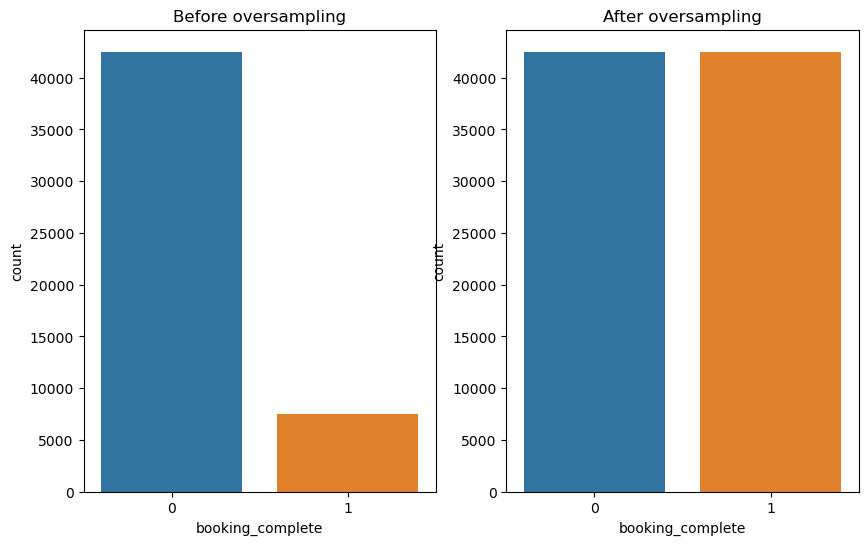

In [1041]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [1042]:
df.shape

(50000, 21)

In [1043]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end,length_of_stay_category,avg_time,day_flight,weekend_flight
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,19.343330,0.112360,1.987620,79.978080,19.343330,9.06634,3.814420,391.905800,38.263340,0.668780,...,0.427140,7.277561,0.149560,6.0,35.090460,36.581420,1.283660,1.306666,0.648340,0.0
std,18.321769,0.315812,0.129873,76.829501,18.321769,5.41266,1.992792,227.297259,32.756539,0.470657,...,0.494668,1.496863,0.356643,0.0,20.316208,14.466008,0.789639,0.840447,0.477493,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,4.670000,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.000000,0.000000,2.000000,21.000000,5.000000,5.00000,2.000000,203.000000,4.000000,0.000000,...,0.000000,5.620000,0.000000,6.0,20.000000,28.000000,1.000000,0.679502,0.000000,0.0
50%,17.000000,0.000000,2.000000,51.000000,17.000000,9.00000,4.000000,381.000000,37.000000,1.000000,...,0.000000,7.570000,0.000000,6.0,33.000000,39.000000,1.000000,1.226994,1.000000,0.0
75%,28.000000,0.000000,2.000000,115.000000,28.000000,13.00000,5.000000,611.000000,57.000000,1.000000,...,1.000000,8.830000,0.000000,6.0,55.000000,50.000000,2.000000,1.849406,1.000000,0.0
max,62.500000,1.000000,2.000000,256.000000,62.500000,23.00000,7.000000,798.000000,103.000000,1.000000,...,1.000000,9.500000,1.000000,6.0,84.000000,63.000000,3.000000,4.925054,1.000000,0.0


In [1044]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end,length_of_stay_category,avg_time,day_flight,weekend_flight
0,19.0,0,2,256.0,19.0,7,6,0,61,1,...,0,5.52,0,6,0,4,1,1.268116,1,0
1,20.0,0,2,112.0,20.0,3,6,0,61,0,...,0,5.52,0,6,0,4,1,0.543478,0,0
2,22.0,0,2,243.0,22.0,17,3,0,36,1,...,0,5.52,0,6,0,4,1,3.079710,1,0
3,31.0,0,2,96.0,31.0,4,6,0,61,0,...,1,5.52,0,6,0,4,0,0.724638,0,0
4,22.0,0,2,68.0,22.0,15,3,0,36,1,...,1,5.52,0,6,0,4,1,2.717391,1,0


In [1045]:
df.booking_origin.value_counts().head(20)

4      17872
51      7174
85      4559
43      3885
17      3387
37      2369
91      2077
93      2030
36      1270
61      1074
80      1044
101      456
103      388
50       304
34       295
71       266
100      173
12       167
14       132
0         84
Name: booking_origin, dtype: int64

In [1046]:
vc=df.booking_origin.value_counts()
cat = vc[vc < 150].index
df['booking_origin'] = df['booking_origin'].replace(cat, 'others')

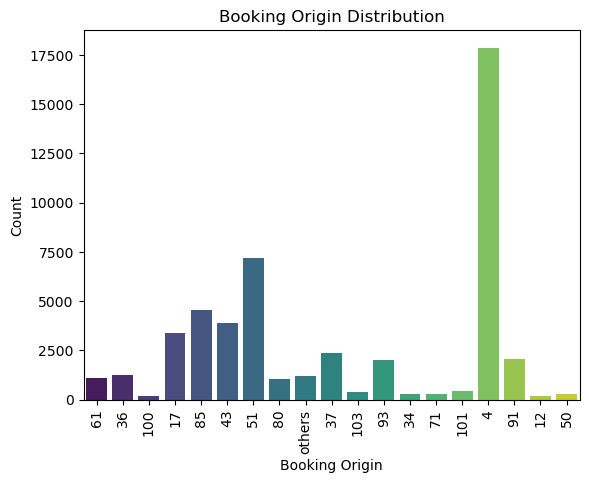

In [1047]:
sns.countplot(x='booking_origin', data=df, palette='viridis')
plt.title('Booking Origin Distribution')
plt.xlabel('Booking Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [1048]:
df.flight_day.value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

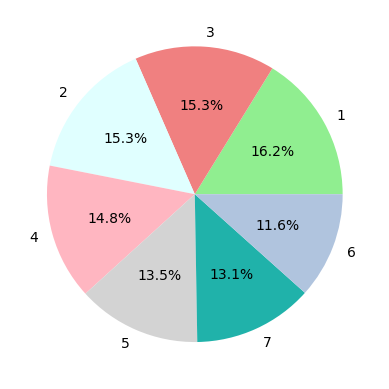

In [1049]:
plt.pie(df.flight_day.value_counts(),labels=df.flight_day.value_counts().index,autopct='%1.1f%%', colors = ['lightgreen', 'lightcoral', 'lightcyan', 'lightpink', 'lightgray', 'lightseagreen', 'lightsteelblue'])
plt.show()

#almost balanced 

In [1050]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_length,start,end,length_of_stay_category,avg_time,day_flight,weekend_flight
num_passengers,1.000000,-0.082533,0.008515,-0.058035,1.000000,-0.041192,-0.000135,0.013091,0.248135,0.024468,0.120917,0.182617,-0.072281,NaN,0.016082,0.079272,-0.934649,-0.095595,-0.022429,NaN
sales_channel,-0.082533,1.000000,0.021237,-0.014978,-0.082533,0.022375,0.042095,-0.020717,-0.054254,0.032943,-0.022235,-0.038629,-0.041060,NaN,-0.020905,-0.033063,0.089296,0.032740,0.001940,NaN
trip_type,0.008515,0.021237,1.000000,-0.010859,0.008515,-0.002758,-0.001381,-0.008754,-0.014078,0.005668,0.011955,-0.039071,0.027021,NaN,-0.006436,-0.012723,-0.002421,0.010529,-0.000541,NaN
purchase_lead,-0.058035,-0.014978,-0.010859,1.000000,-0.058035,0.036440,0.037642,-0.106630,-0.011570,0.001869,-0.014648,0.075427,-0.024504,NaN,-0.104131,-0.088701,0.034172,0.005451,-0.003284,NaN
length_of_stay,1.000000,-0.082533,0.008515,-0.058035,1.000000,-0.041192,-0.000135,0.013091,0.248135,0.024468,0.120917,0.182617,-0.072281,NaN,0.016082,0.079272,-0.934649,-0.095595,-0.022429,NaN
flight_hour,-0.041192,0.022375,-0.002758,0.036440,-0.041192,1.000000,0.024086,-0.016735,-0.011434,0.012171,0.013014,-0.002101,0.007127,NaN,-0.015893,-0.001713,0.041044,0.910880,0.432094,NaN
flight_day,-0.000135,0.042095,-0.001381,0.037642,-0.000135,0.024086,1.000000,-0.016883,-0.002503,0.005392,0.009281,0.018434,-0.006986,NaN,-0.016204,-0.015401,0.000281,0.015613,-0.008514,NaN
route,0.013091,-0.020717,-0.008754,-0.106630,0.013091,-0.016735,-0.016883,1.000000,0.026334,0.016270,-0.011232,-0.137320,-0.008488,NaN,0.994001,0.527028,-0.012243,0.039829,0.009653,NaN
wants_extra_baggage,0.248135,-0.054254,-0.014078,-0.011570,0.248135,-0.011434,-0.002503,0.026334,1.000000,0.207669,0.216470,0.057054,0.068139,NaN,0.026872,0.018160,-0.258115,-0.028600,0.015143,NaN
wants_preferred_seat,0.024468,0.032943,0.005668,0.001869,0.024468,0.012171,0.005392,0.016270,0.207669,1.000000,0.315088,0.101289,0.050116,NaN,0.016870,0.024706,-0.024434,-0.025216,-0.001609,NaN


In [1051]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'route_length', 'start', 'end', 'length_of_stay_category', 'avg_time',
       'day_flight', 'weekend_flight'],
      dtype='object')

In [1053]:
df=df[['sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'flight_duration', 'booking_complete', 'start', 'end', 'length_of_stay_category', 'avg_time',
       'day_flight']]

In [1054]:
df.describe()

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,flight_duration,booking_complete,start,end,length_of_stay_category,avg_time,day_flight
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.112360,1.987620,79.978080,19.343330,9.06634,3.814420,391.905800,7.277561,0.149560,35.090460,36.581420,1.283660,1.306666,0.648340
std,0.315812,0.129873,76.829501,18.321769,5.41266,1.992792,227.297259,1.496863,0.356643,20.316208,14.466008,0.789639,0.840447,0.477493
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,5.000000,5.00000,2.000000,203.000000,5.620000,0.000000,20.000000,28.000000,1.000000,0.679502,0.000000
50%,0.000000,2.000000,51.000000,17.000000,9.00000,4.000000,381.000000,7.570000,0.000000,33.000000,39.000000,1.000000,1.226994,1.000000
75%,0.000000,2.000000,115.000000,28.000000,13.00000,5.000000,611.000000,8.830000,0.000000,55.000000,50.000000,2.000000,1.849406,1.000000
max,1.000000,2.000000,256.000000,62.500000,23.00000,7.000000,798.000000,9.500000,1.000000,84.000000,63.000000,3.000000,4.925054,1.000000


In [1055]:
df.head()

,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,start,end,length_of_stay_category,avg_time,day_flight
0,0,2,256.0,19.0,7,6,0,61,5.52,0,0,4,1,1.268116,1
1,0,2,112.0,20.0,3,6,0,61,5.52,0,0,4,1,0.543478,0
2,0,2,243.0,22.0,17,3,0,36,5.52,0,0,4,1,3.079710,1
3,0,2,96.0,31.0,4,6,0,61,5.52,0,0,4,0,0.724638,0
4,0,2,68.0,22.0,15,3,0,36,5.52,0,0,4,1,2.717391,1


In [1056]:
df.corr()['booking_complete'].sort_values(ascending=True).head(40)

flight_duration           -0.106266
length_of_stay            -0.072281
end                       -0.056773
sales_channel             -0.041060
purchase_lead             -0.024504
start                     -0.010609
route                     -0.008488
flight_day                -0.006986
flight_hour                0.007127
day_flight                 0.019815
trip_type                  0.027021
avg_time                   0.043645
length_of_stay_category    0.096571
booking_complete           1.000000
Name: booking_complete, dtype: float64

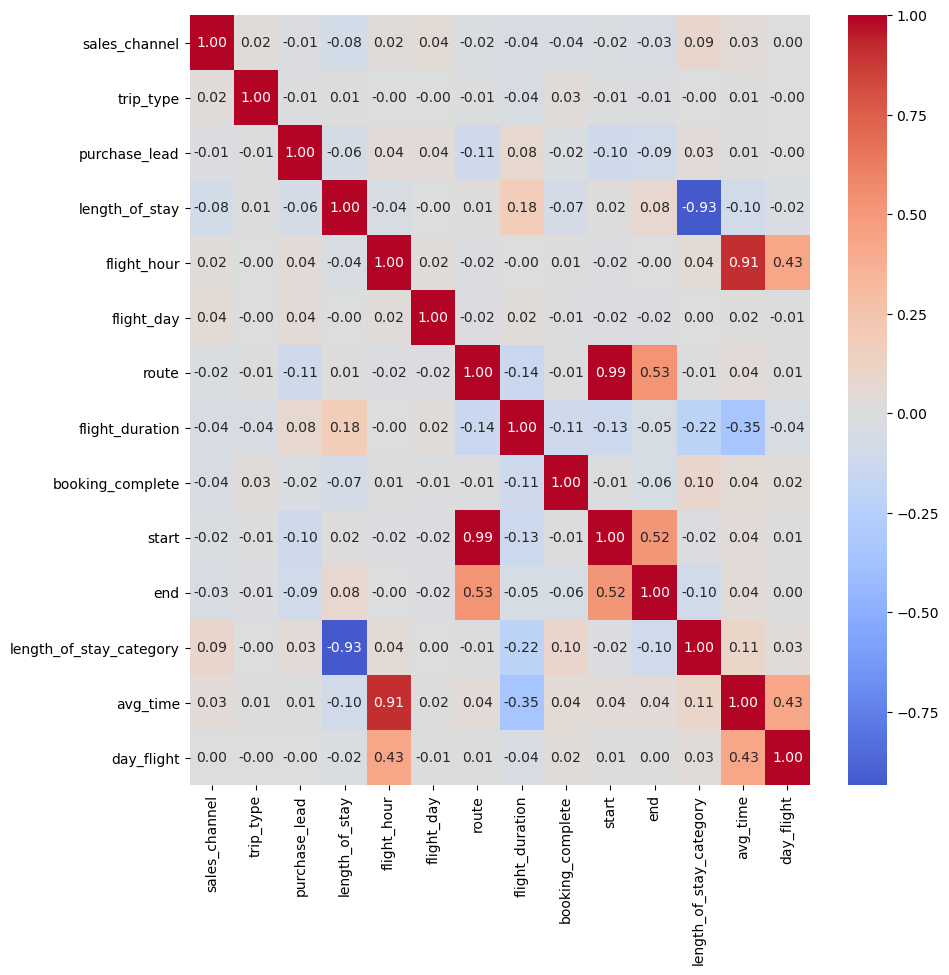

In [1058]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={'size': 10},fmt='.2f', center=0)
plt.show()

In [1059]:
sel = ['booking_origin','flight_duration','flight_hour','booking_complete']
new_df = df[sel].copy()

In [1060]:
new_df

,booking_origin,flight_duration,flight_hour,booking_complete
0,61,5.52,7,0
1,61,5.52,3,0
2,36,5.52,17,0
3,61,5.52,4,0
4,36,5.52,15,0
...,...,...,...,...
49995,4,5.62,9,0
49996,4,5.62,4,0
49997,4,5.62,22,0
49998,4,5.62,11,0


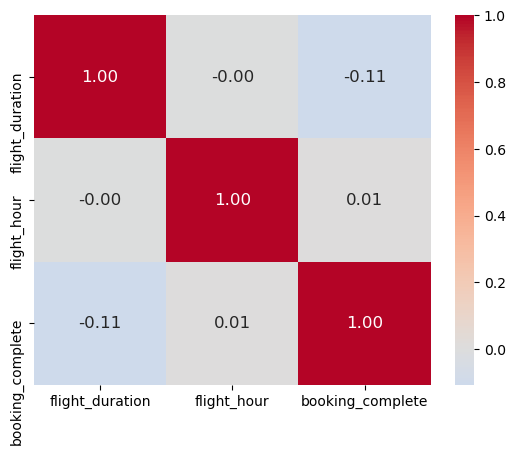

In [1061]:
sns.heatmap(new_df.corr(),cmap='coolwarm', annot=True, annot_kws={'size': 12},fmt='.2f', center=0)
plt.show()

In [1062]:
col=['booking_origin','flight_duration', 'flight_hour','booking_complete']

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:106: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:106: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 2500x2500 with 0 Axes>

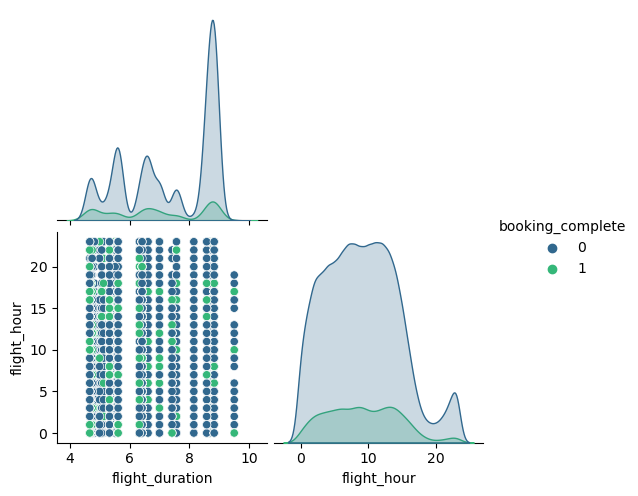

In [1063]:
plt.figure(figsize=(25,25))
sns.pairplot(new_df[col], diag_kind='kde', hue= 'booking_complete', palette='viridis',corner='lower')
plt.show()

In [1064]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#getting libraries

In [1065]:
new_df.corr()

,flight_duration,flight_hour,booking_complete
flight_duration,1.000000,-0.002101,-0.106266
flight_hour,-0.002101,1.000000,0.007127
booking_complete,-0.106266,0.007127,1.000000


In [1066]:
X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.25, random_state=12)

In [1067]:
print('Shape of x_train {}'.format(X_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(X_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (63783, 20)
Shape of y_train (63783,)
Shape of x_test (21261, 20)
Shape of y_test (21261,)


In [1068]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.63
Test Accuracy: 0.64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1069]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.84


In [1070]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.90


In [1071]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.92
Test Accuracy: 0.90


In [1072]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.92
Test Accuracy: 0.90


In [1073]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

In [1074]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

In [1075]:
table = pd.DataFrame.from_dict(results, orient='index')
table.index.name = 'Model'
table

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.639716,0.634485,0.670995,0.652229
K-Nearest Neighbors,0.814966,0.756225,0.933396,0.835521
Decision Tree,0.837684,0.827406,0.856235,0.841574
Random Forest,0.903156,0.917036,0.887996,0.902283
XGBoost,0.895254,0.930268,0.856142,0.891667
